To get started, run the following commands to install the module for OpenAI.

In [11]:
!pip install openai

You should consider upgrading via the '/Users/masato/Desktop/git_work/DiagramMaker/venv/bin/python -m pip install --upgrade pip' command.


# Initialize the Azure OpenAI environment variables and define function

The first step is to initialize the environment variables with the API key and endpoint URL issued by your Azure OpenAI resource. This will allow you to access the OpenAI service in the subsequent processing.

Next, you define a function that interacts with the OpenAI service. This function generates questions using the specified model and prompt (input text). You can adjust the length and diversity of the generated questions through the function's arguments.

Inside the function, it establishes a connection to Azure OpenAI using the API information retrieved from the environment variables, and then calls the OpenAI API to generate the question. The generated question is returned as text.

With these preparations, you can generate questions from Azure OpenAI's language model simply by specifying the appropriate model and prompt, then executing the function.

In [3]:
from openai import AzureOpenAI # This test openai version is 1.13.3
import json

# Load config values
with open(r'config.json') as config_file:
    config_details = json.load(config_file)

client = AzureOpenAI(
  azure_endpoint = config_details["OPENAI_API_BASE"], 
  api_key=config_details["OPENAI_API_KEY"],
  api_version=config_details["OPENAI_API_VERSION"]
)



def create_diagram(content):

    print("Creating a diagram. Please wait...")

    message_text = [
        {"role":"system",
        "content":"You are tasked with illustrating Azure learners using mermaid diagrams. Here is a question to help you get started."},
        {"role":"user",
        "content":content}
    ]

    completion = client.chat.completions.create(
    model=config_details["DEPLOYMENT_NAME"], # model = "deployment_name"
    messages = message_text,
    temperature=0.7,
    max_tokens=800,
    top_p=0.95,
    frequency_penalty=0,
    presence_penalty=0,
    stop=None
    )

    print(completion.choices[0].message.content)


It's very simple after that. Please run the following code. By changing the URL, the content of the generated question will vary, so you should find it enjoyable. Question generation takes around 10 seconds.

In [7]:
content = 'Azure authentication'
create_diagram(content)

Creating a diagram. Please wait...
Here is a mermaid diagram illustrating Azure authentication:

```mermaid
graph LR
A[Client] -- 1. Authentication request --> B[Azure Active Directory]
B -- 2. Authentication response --> A
B -- 3. Access token request --> C[Token Service]
C -- 4. Access token response --> B
B -- 5. Access token --> A
```

Explanation:

1. The client initiates an authentication request to Azure Active Directory (AAD).
2. AAD authenticates the client and sends an authentication response back.
3. The client requests an access token from the Token Service in AAD.
4. The Token Service validates the request and sends an access token response back.
5. AAD sends the access token to the client, which can then use it to access Azure resources.

Please note that this diagram represents a simplified overview of the Azure authentication process. The actual process may involve more steps and additional components depending on the specific scenario.


Try pasting the mermaid section generated by running the code into the following site: There are various sites that output mermaid format code to shapes.

https://mermaid.live/

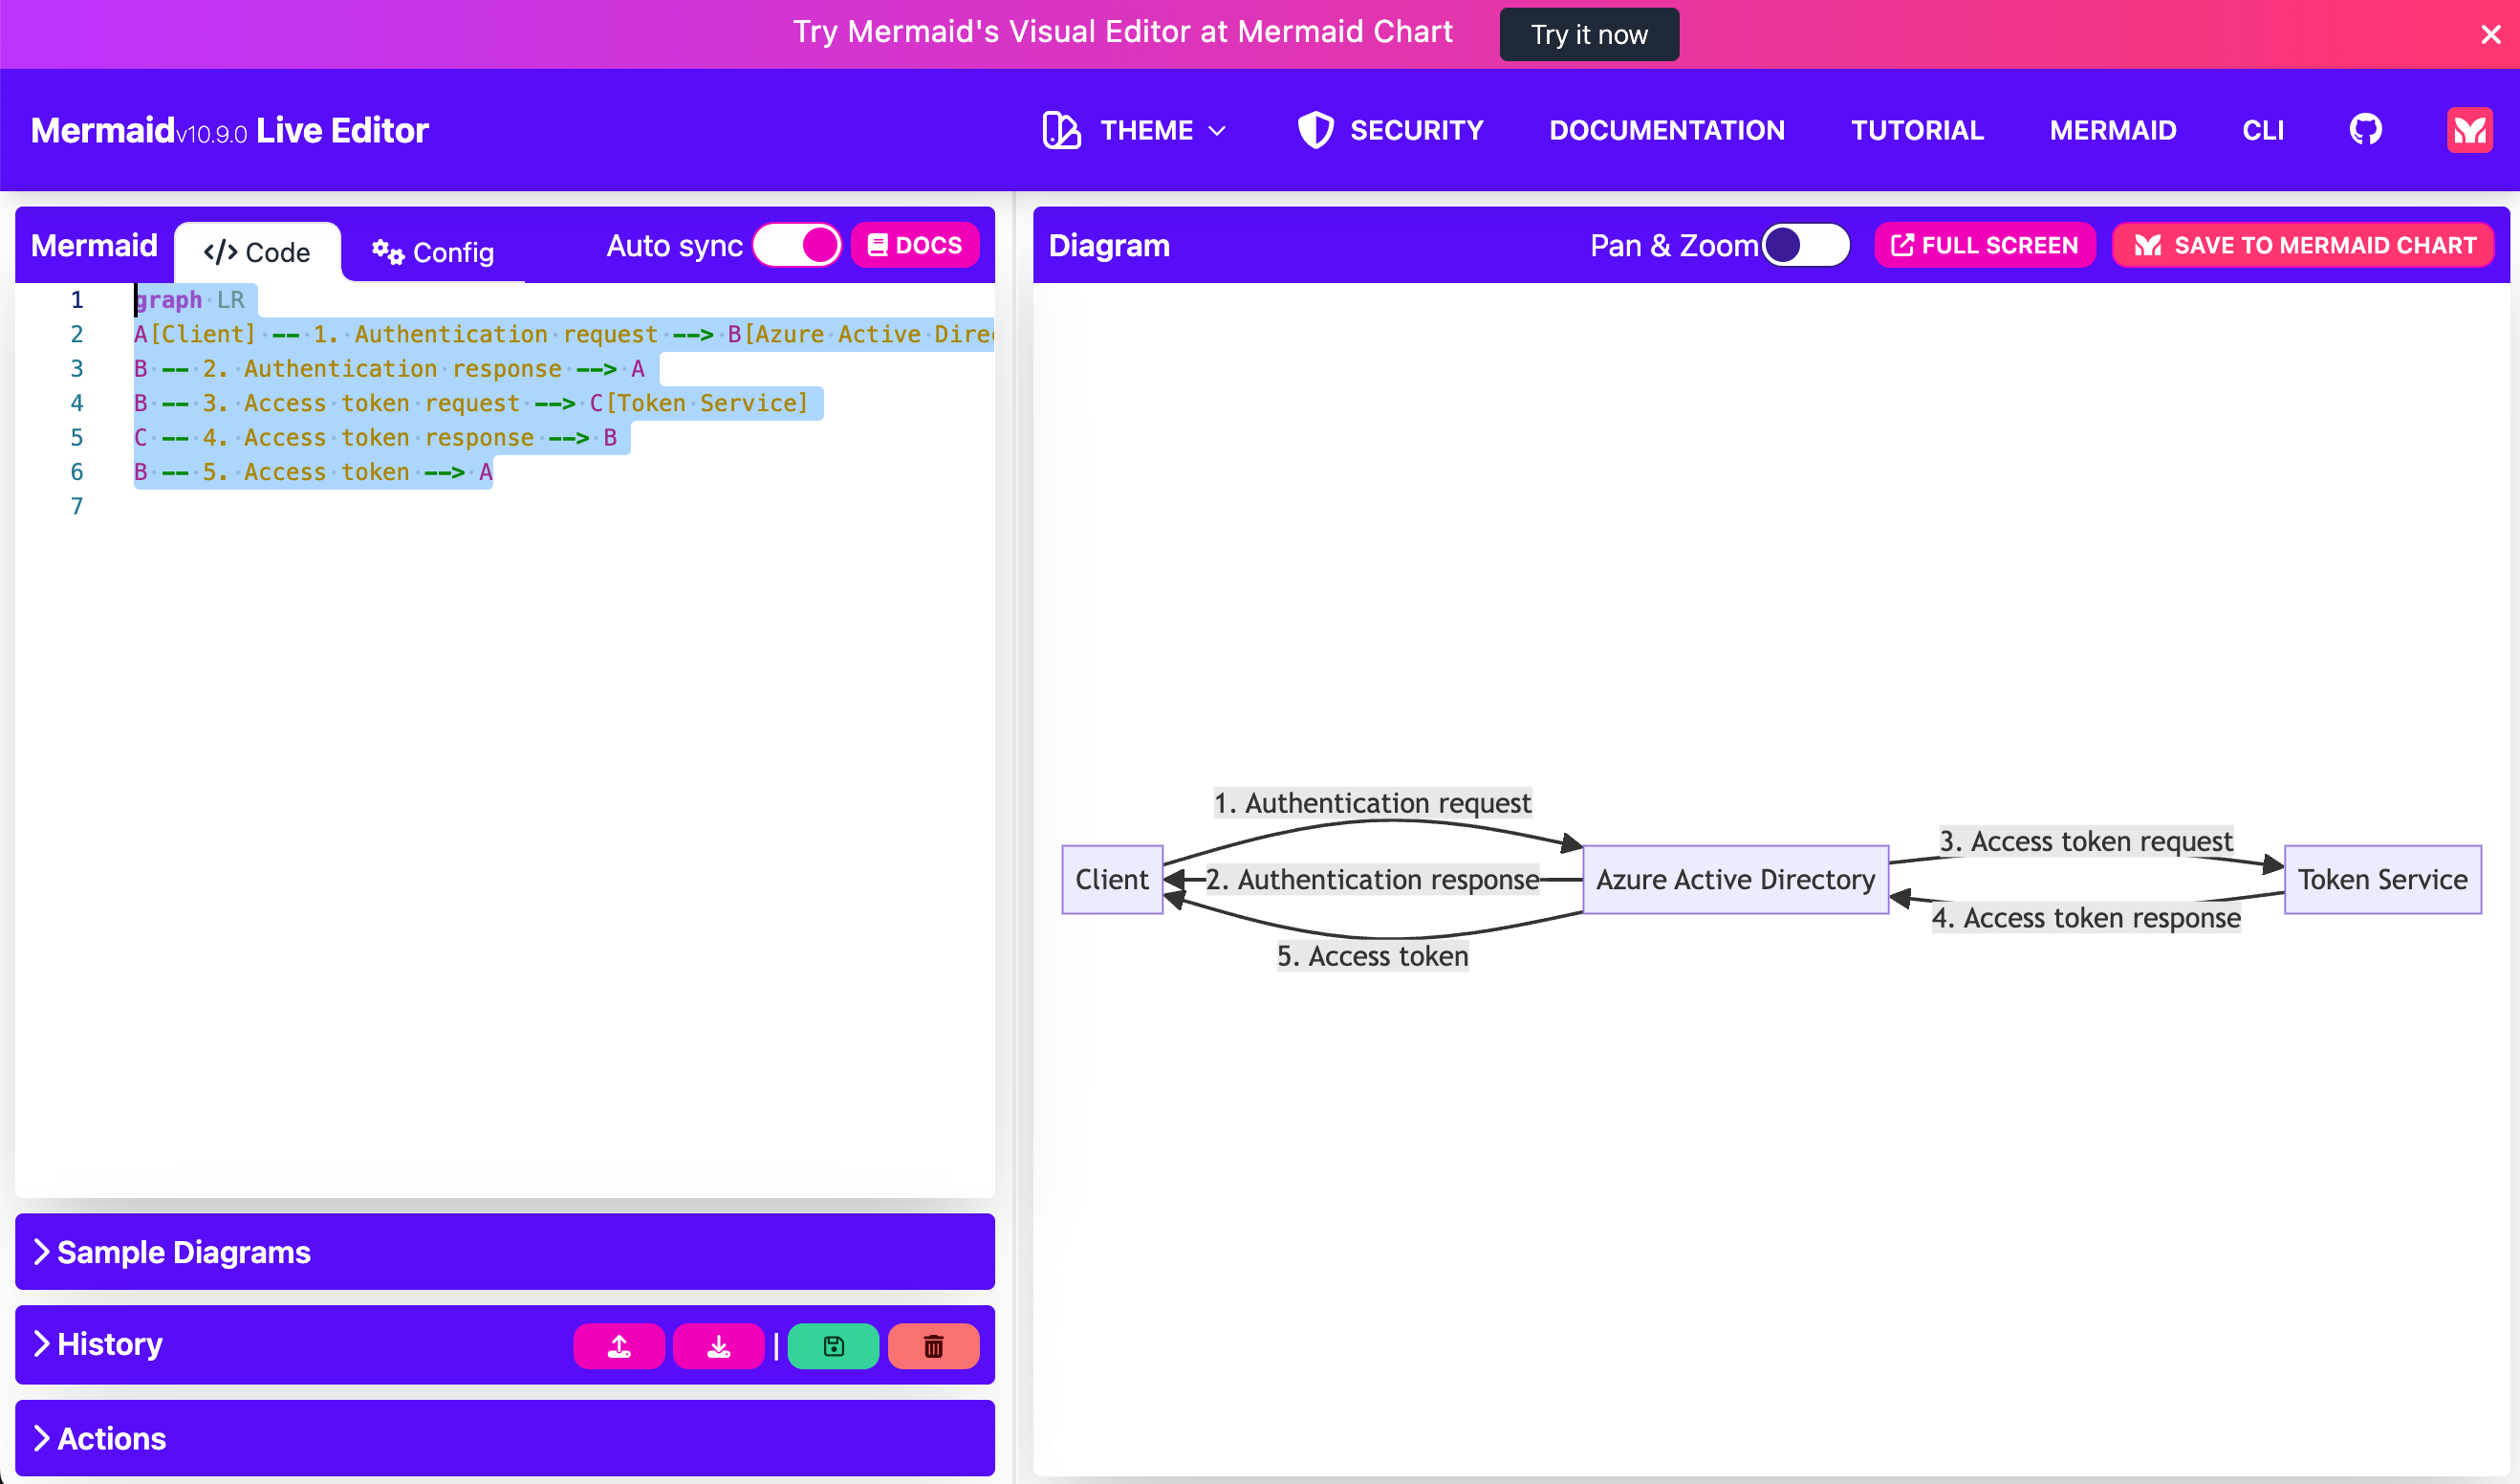

I'll provide another sample:

In [12]:
content = 'Azure history by timeline'
create_diagram(content)

Creating a diagram. Please wait...
To illustrate the history of Azure using a mermaid diagram, you can use the following code:

```mermaid
graph LR
A(Azure launched) --> B(Windows Azure)
A --> C(Azure Services Platform)
C --> D(Azure AppFabric)
C --> E(Azure Marketplace)
C --> F(Azure SQL Database)
C --> G(Azure Virtual Machines)
C --> H(Azure Service Bus)
C --> I(Azure Storage)
C --> J(Azure CDN)
C --> K(Azure Media Services)
C --> L(Azure Active Directory)
C --> M(Azure Traffic Manager)
C --> N(Azure Multi-Factor Authentication)
C --> O(Azure Backup)
C --> P(Azure Site Recovery)
C --> Q(Azure ExpressRoute)
C --> R(Azure Machine Learning)
C --> S(Azure Logic Apps)
C --> T(Azure Functions)
C --> U(Azure Cognitive Services)
```

This diagram shows the launch of Azure, followed by the introduction of various Azure services and platforms over time. The diagram helps visualize the progression and expansion of Azure's offerings since its inception.


To learn more about what types of charts you can create, please visit this site. There are various types of diagrams available for you to try.

https://mermaid.js.org/ecosystem/tutorials.html